# Goals of this Notebook

- Review acquisition of data from text files with Python
- Learn to structure data in Python variables that facilitate various analyses
- Gain experience with <font face='courier'>for</font> loops
- Gain insight into multidimensional data structures
- Gain expertise in structuring data within multidimensional data structures
- Introduce you to terms used in industry, such as _customer retention_ and _networks_
- Introduce you to topics in future MSBA courses
  - Reshaping multidimensional arrays (AI - neural networks)
  - Markov models, stochastic models
  - Time series analysis

Business analytics professionals must know how to access data programmatically, clean it, and structure it to suit the requirements of the intended methodology.  Some methologies might require data in lists while other methodologies might require dictionaries.  This session helps develop this skill using basic Python commands.

Multidimensional data is often referred to as n-dimensional data and tensors.  Some examples are shown below.  While vectors and matrices are technically tensors, the name tensor is frequently reserved for data structures of three or more dimensions.  You must be able to iterate through these data structures to simply retrieve the elements or to use the element values in mathematical operations.

![Tensor Examples](images/tensor-examples.jpg)

(Image retrieved from [KDNuggets](https://www.kdnuggets.com/2018/05/pytorch-tensor-basics.html) on 7/30/2020)

Acquiring and structuring data within Python variables requires loops, and so this material relies heavily on loops.

Later, you will often use the <font face='courier'>numpy</font> and <font face='courier'>pandas</font> packages to ease data acquisition and structuring.  These packages, however, hide the details from you which are very important to know.  for example, numpy and pandas does the operations we will demonstrate _under the covers_ and you will not be able to troubleshoot problems with those packages unless you understand the basics.  It is important, therefore, to practice these computations with loop statements that we explicitly write which gives you the essential insight into what the more advanced programming statements are doing.  

Whenever lists or dictionaries are created with <font face='courier'>for</font> loops, it is natural to think about doing so more succinctly using list comprehension and dictionary comprehension, respectively.  We will cover these alternate methods in this session, therefore, as well.

This material also prepares you with the skills and context for success in subsequent courses.


# Python Methods in this Notebook

- Text file data input with <font face = 'courier new'>open()</font> statement
- <font face = 'courier'>for</font> loops
- List comprehension
- Dictionary comprehension

# Skills Refresher Navigation <a name='navigation' />
- Go to <a href = #loops><font face='courier'>for</font> loops</a>
- Go to <a href = #ListComprehension>List Comprehension</a>
- Go to <a href = #dictionaries>Dictionaries</a>
- Go to <a href = #LoopThroughDict>Looping through dictionaries</a>
- Go to <a href = #DictComp>Dictionary Comprehension</a>
- Go to <a href = #aliasing>Aliasing</a>


# Handling Data with Basic Python
Back to <a href = '#navigation'>Navigation</a>

## 1D Data: Times Series Analysis
Back to <a href = '#navigation'>Navigation</a>

* Data structure
  * 1-dimensional array (vector)
  * Represented with a Python list
  * Possibly with an associated index
* Operations
  * Reading data from file
  * Arranging in a 1D list
* Analysis
  * Moving average

First, time series data are data that are collected over time at constant intervals.  Examples include, daily or hourly weather data, daily sales of an item or all company sales in total (either in units or dollar volume), number of daily visits to a web site, and annual gross domestic product.  You can surely think of other examples.

One issue that arises with time series data is to summarize the pattern over time despite there being frequent highs and lows (noise) and highs and lows over longer periods (either economic cycles or seasonal effects).  Computing the moving average is a frequently used method for summarizing the trend that is muddied by the short-term noise.

Let our time series data be collected for time indices $d \in \left\lbrace 0, ... , D-1 \right\rbrace$, where $d$ stands for the index for a given day. We will be considering daily time series for a year, so $D=365$.  A moving average, $ma_n(d)$ of $n$ days for day $d$ is defined as:

$ma_n(d) = \frac{1}{n} \Sigma_{i = d-n+1}^d t(i)$

where $t(d)$ is the average temperature for day $d$.  Note that $ma(d)$ is defined only for day in this range: $d \in \left\lbrace n-1, \ldots ,    D-1 \right\rbrace$.

The files <font face = 'courier'>NorfolkWeather1999.csv</font> and <font face = 'courier'>NorfolkWeather2018.csv</font>  have the daily average temperatures for the years indicated in the filenames.  Load each of these text files into a list (load only the daily average temperature and not the row index), and then create new lists, <font face = 'courier'>ma1999</font> and <font face = 'courier'>ma2018</font>, that are 10-day moving averages of the original data.

Although we are not focusing on plotting in this session, we will compare the two moving average series using the <font face = 'courier'>matplotlib</font> package.

Let's read the 1999 data file first. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 

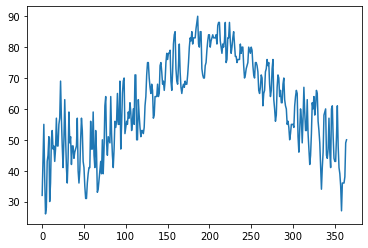

In [9]:
f = open('NorfolkWeather1999.csv','r')
nw1999 = f.readlines()
f.close()

x = []

for i in range(len(nw1999)):
    nw1999[i] = nw1999[i].strip().split(',')
    #nw1999[i] = nw1999[i].split(',')
    x.append(int(nw1999[i][0]))
    nw1999[i] = float(nw1999[i][1])
#nw1999 = list(map(float,nw1999))

plt.plot(x, nw1999, label = '1999')
plt.show()

Now, read in the 2018 data.

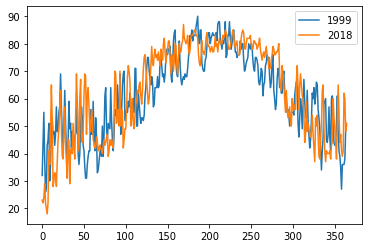

In [7]:
f = open('NorfolkWeather2018.csv','r')
nw2018 = f.readlines()
f.close()

for i in range(len(nw2018)):
    nw2018[i] = nw2018[i].strip()
    nw2018[i] = nw2018[i].split(',')
    nw2018[i] = float(nw2018[i][1])
#nw2018 = list(map(float,nw2018))

""" Plot both data series """
plt.plot(nw1999, label = '1999')
plt.plot(nw2018, label = '2018')
plt.legend()
plt.show()

The two code blocks could be combined and the repetitive clean-up steps can be put into a function to clean up the code.

In [ ]:
def strip_split_convert(x):
    for i in range(len(x)):
        x[i] = x[i].strip()
        x[i] = x[i].split(',')
        x[i] = float(x[i][1])
    #x = list(map(float,x))
    return x
    
f = open('NorfolkWeather1999.csv','r')
nw1999 = f.readlines()
f.close()

f = open('NorfolkWeather2018.csv','r')
nw2018 = f.readlines()
f.close()

nw1999 = strip_split_convert(nw1999)
nw2018 = strip_split_convert(nw2018)
plt.plot(nw1999, label = '1999')
plt.plot(nw2018, label = '2018')
plt.legend()
plt.show()

Moving averages are used to remove variability from the data so that the overall trend is more apprent.  Let's compute and plot the moving averages of the two data series and compare the two results.

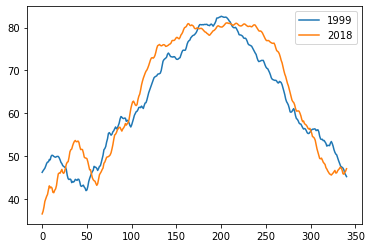

In [15]:
period = 25
ma1999 = []
for i in range(period-1,len(nw1999)):
    ma1999.append(sum(nw1999[i-(period-1):i+1])/period)
ma2018 = []
for i in range(period-1,len(nw2018)):
    ma2018.append(sum(nw2018[i-(period-1):i+1])/period)
plt.plot(ma1999, label = '1999')
plt.plot(ma2018, label = '2018')
plt.legend()
plt.show()

In [10]:
period = 10
[sum(nw1999[i-(period-1):i+1])/period for i in range(period-1,len(nw1999))]

[39.1,
 39.5,
 40.2,
 40.0,
 40.9,
 43.1,
 44.6,
 45.0,
 46.2,
 45.9,
 47.7,
 49.6,
 50.3,
 51.9,
 52.9,
 52.9,
 52.7,
 53.0,
 53.6,
 53.9,
 53.2,
 51.3,
 50.0,
 49.0,
 48.2,
 48.5,
 48.6,
 48.4,
 46.9,
 46.2,
 46.7,
 47.8,
 48.2,
 48.0,
 47.1,
 45.6,
 45.4,
 45.6,
 46.5,
 47.4,
 47.1,
 46.5,
 45.2,
 42.6,
 41.7,
 41.7,
 41.6,
 40.7,
 39.1,
 39.4,
 39.8,
 40.4,
 42.8,
 44.2,
 45.2,
 46.9,
 47.6,
 46.8,
 46.1,
 44.2,
 43.5,
 43.1,
 41.1,
 41.6,
 41.4,
 40.8,
 42.3,
 45.4,
 46.9,
 47.7,
 48.8,
 49.5,
 50.5,
 51.9,
 53.2,
 53.0,
 51.0,
 49.3,
 50.0,
 50.9,
 51.4,
 52.9,
 53.5,
 52.6,
 54.3,
 54.5,
 55.9,
 57.7,
 59.0,
 60.6,
 60.2,
 59.1,
 59.2,
 59.2,
 58.2,
 59.2,
 59.9,
 59.3,
 57.7,
 56.3,
 57.1,
 57.2,
 58.7,
 60.3,
 59.4,
 58.7,
 58.8,
 58.7,
 58.8,
 58.3,
 57.6,
 57.4,
 55.5,
 53.8,
 54.9,
 56.3,
 57.1,
 58.8,
 60.9,
 62.8,
 64.2,
 65.4,
 67.0,
 68.2,
 67.8,
 67.2,
 66.5,
 65.4,
 64.3,
 64.1,
 63.8,
 63.8,
 64.4,
 65.3,
 66.8,
 67.8,
 68.3,
 68.5,
 69.0,
 69.7,
 71.1,
 72.2,
 72.6,

In [10]:
sample = list(range(25))
sample[0:9]

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
period = 10

ma1999 = [sum(nw1999[i-period:i])/period for i in range(period,len(nw1999))]
ma2018 = [sum(nw2018[i-period:i])/period for i in range(period,len(nw2018))]

plt.plot(ma1999, label = '1999')
plt.plot(ma2018, label = '2018')
plt.legend()

plt.show()

## 2D Data: Markov Analysis of Customer Retention
Back to <a href = '#navigation'>Navigation</a>

* Data structure
  * 2-dimensional array (matrix)
  * Represented with a Python list of lists
* Operations
  * Reading data from file
  * Arranging in a 2D list
* Analysis
  * Customer forecasts with the  transition matrix

Companies believe it is less costly to keep a customer than to acquire a new one.  Companies are, therefore, interested in understanding customers buying patterns, analyzing how long a customer is likely to continue buying from them, and figuring out how to intervene in the customer lifecycle to prolong relationships with customers.

One might measure a customer's activity by selling season (if you worked for LL Bean), keeping track of whether a customer made a purchase from each season's catalog.

![LL Bean Catalogs](images/catalogs.jpg)

We can measure a customer's current level of activity by how many seasons it has been since their last purchase, which is called a customer's _state_ in Markov systems.  So, a customer's state is indicated by an integer from $0$ to $\infty$, which is the number of seasons since their last purchase.  What is described above is called a _periodic_ system because we observe customers' states at discrete periodic intervals where, here, each period is one season long.

Practically, we don't need to consider any states past some number of $n$ seasons, where customers who have not pruchased in $n$ seasons are unlikely to make another purchase from LL Bean again.  We might consider customers who haven't made a purchase in the past $n$, for some appropritely sized $n$, to exhibit behaviors akin to a new customer rather than a current one.

We could determine the percentage of times that customers in each of these states made purchases and, conversely the percentage of times they did not: these proportions can be interpreted as the probabilities of, respectively, a customer's state transitioning to $0$ and increasing by one. These probabiltiies are typical represented in a _Transition Matrix_ as shown below.  The notation $p_{x,y}$ represents the probability, or percentage of customers, on average, who transition from State $x$ to State $y$.  Note that it makes sense for all probabilities in each row to sum to $1$ because all customers (100%) in any state must transition to some state.  Call the entirety of this matrix $P$.

![Transition Matrix](images/TransitionMatrix.jpg)

If $c$ is a column vector with

$c^T = [c_0 \text{   } c_1 \text{   }  c_2 \text{   }  c_3  \text{   }  c_4 \text{   }  c_5]$

where $c_i$ is the number of customers in state $i$ at some point in time, then the number of customers in each state after the next transition step is

$c^TP$,

or, alternately, as a column vector,

$P^Tc$.

First, let's read in transition matrix data from a text file (<font face='courier'>transMat.txt</font>) and instantiate a Python data structure representing $P$.  The greatest state in this file  is $n=5$.  Pay attention to ensure that all the elements are converted to numerical quantities.

In [2]:
""" Read the transition matrix file data into a list of lists with numerical elements """
f = open('transMat.txt', 'r')
data = f.readlines()
f.close()

for i in range(len(data)):
    data[i] = data[i].strip().split(',')
    for j in range(len(data[i])):
        data[i][j] = float(data[i][j])
data

[[0.5, 0.5, 0.0, 0.0, 0.0, 0.0],
 [0.5, 0.0, 0.5, 0.0, 0.0, 0.0],
 [0.45, 0.0, 0.0, 0.55, 0.0, 0.0],
 [0.4, 0.0, 0.0, 0.0, 0.6, 0.0],
 [0.35, 0.0, 0.0, 0.0, 0.0, 0.65],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]

In [2]:
f = open('transMat.txt', 'r')
data = f.readlines()
f.close()

P = []
for i in range(len(data)):
    new_row = []
    data[i] = data[i].strip().split(',')
    for j in range(len(data[i])):
        new_row.append(float(data[i][j]))
    P.append(new_row)
del data
P

[[0.5, 0.5, 0.0, 0.0, 0.0, 0.0],
 [0.5, 0.0, 0.5, 0.0, 0.0, 0.0],
 [0.45, 0.0, 0.0, 0.55, 0.0, 0.0],
 [0.4, 0.0, 0.0, 0.0, 0.6, 0.0],
 [0.35, 0.0, 0.0, 0.0, 0.0, 0.65],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]

In [1]:
""" Read the transition matrix file data into a list of lists with numerical elements with list comprehension """
f = open('transMat.txt', 'r')
data = f.readlines()
f.close()

[[float(element) for element in data[i].strip().split(',')] for i in range(len(data))]

FileNotFoundError: [Errno 2] No such file or directory: 'transMat.txt'

In [16]:
""" Read the transition matrix file data into a list of lists with numerical elements with list comprehension """
[[float(element) for element in line.strip().split(',')] for line in open('transMat.txt', 'r')]

[[0.5, 0.5, 0.0, 0.0, 0.0, 0.0],
 [0.5, 0.0, 0.5, 0.0, 0.0, 0.0],
 [0.45, 0.0, 0.0, 0.55, 0.0, 0.0],
 [0.4, 0.0, 0.0, 0.0, 0.6, 0.0],
 [0.35, 0.0, 0.0, 0.0, 0.0, 0.65],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]

In [17]:
""" Read the transition matrix file data into a list of lists with numerical elements with list comprehension """
f = open('transMat.txt', 'r')
result = [[float(element) for element in line.strip().split(',')] for line in f]
f.close()
result

[[0.5, 0.5, 0.0, 0.0, 0.0, 0.0],
 [0.5, 0.0, 0.5, 0.0, 0.0, 0.0],
 [0.45, 0.0, 0.0, 0.55, 0.0, 0.0],
 [0.4, 0.0, 0.0, 0.0, 0.6, 0.0],
 [0.35, 0.0, 0.0, 0.0, 0.0, 0.65],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]

In [19]:
with open('transMat.txt', 'r') as f:
    result = [[float(element) for element in line.strip().split(',')] for line in f]
result

[[0.5, 0.5, 0.0, 0.0, 0.0, 0.0],
 [0.5, 0.0, 0.5, 0.0, 0.0, 0.0],
 [0.45, 0.0, 0.0, 0.55, 0.0, 0.0],
 [0.4, 0.0, 0.0, 0.0, 0.6, 0.0],
 [0.35, 0.0, 0.0, 0.0, 0.0, 0.65],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]

#### Compute Next Period Customer Distribution with the Transition Matrix

Let's represent our current customer base by a vector with each element representing the number of customers in each state, $s = \left\lbrace 0, 1, \ldots , 5 \right\rbrace$. Name a Python variable <font face = 'courier'>custNow</font> to represent the population of customers in each category now and <font face = 'courier'>custNext</font> to represent the expected number of customers in each category next period.  Compute the expected number of customers in each of the states for next season, <font face = 'courier'>custNext</font>.

In [4]:
custNow = [1024, 512, 256, 2048, 5092, 10184]

custNext = []

for j in range(len(P[0])):
    element = 0
    for i in range(len(P)):
        element += custNow[i] * P[i][j]
    custNext.append(element)
custNext, sum(custNow), sum(custNext)

([3484.6, 512.0, 256.0, 140.8, 1228.8, 13493.8], 19116, 19116.0)

Perform the previous computation with list comprehension.

In [6]:
[sum([custNow[i] * P[i][j] for i in range(len(P))]) for j in range(len(P[0]))]

[3484.6, 512.0, 256.0, 140.8, 1228.8, 13493.8]

## Another Computation with the Transition Matrix

The transition matrix for two seasons in the future is the transition matrix multiplied by itself, that is, the dot product of $P$ with itself.  Perform that calculation.

![Matrix Multiplication](images/P2.jpg)

In [11]:
P2 = []
for i in range(len(P)):
    r = []
    for j in range(len(P[0])):
        element = 0
        for k in range(len(P)):
            element += P[i][k] * P[k][j]
        r.append(element)
    P2.append(r)
P2

[[0.5, 0.25, 0.25, 0.0, 0.0, 0.0],
 [0.475, 0.25, 0.0, 0.275, 0.0, 0.0],
 [0.44500000000000006, 0.225, 0.0, 0.0, 0.33, 0.0],
 [0.41000000000000003, 0.2, 0.0, 0.0, 0.0, 0.39],
 [0.175, 0.175, 0.0, 0.0, 0.0, 0.65],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]

In [9]:
import numpy as np

In [10]:
np.matmul(P,P)

array([[0.5  , 0.25 , 0.25 , 0.   , 0.   , 0.   ],
       [0.475, 0.25 , 0.   , 0.275, 0.   , 0.   ],
       [0.445, 0.225, 0.   , 0.   , 0.33 , 0.   ],
       [0.41 , 0.2  , 0.   , 0.   , 0.   , 0.39 ],
       [0.175, 0.175, 0.   , 0.   , 0.   , 0.65 ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.   ]])

Perform the computation above with list comprehension.

In [12]:
[[sum([P[i][k] * P[k][j] for k in range(len(P))]) for j in range(len(P[0]))]for i in range(len(P))]

[[0.5, 0.25, 0.25, 0.0, 0.0, 0.0],
 [0.475, 0.25, 0.0, 0.275, 0.0, 0.0],
 [0.44500000000000006, 0.225, 0.0, 0.0, 0.33, 0.0],
 [0.41000000000000003, 0.2, 0.0, 0.0, 0.0, 0.39],
 [0.175, 0.175, 0.0, 0.0, 0.0, 0.65],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]

## A Final Computation with the Transition Matrix

What is the expected customer population by state five years (20 seasons, 100 seasons) from now?

## 2D Data: Rendering a Grayscale Image
Back to <a href = '#navigation'>Navigation</a>

* Data structure
  * 2-dimensional array (matrix)
  * Represented with a Python list of lists
* Operations
  * Creating data (2D list) with list comprehension
  * Reshaping a 2D list of lists into a 1D list
* Analysis
  * Plotting data with <font face='courier'>matplotlib</font>

Let's look at some basics of rendering images in two dimensions before we move on to 3D data.

Rather than input data from a file, we'll quickly create some data with code for this example of how to render a grayscale immage.  We will use <font face='courier'>matplotlib</font> to render the image by 'plotting' each pixel.  Grayscale pixels are coded with integers from 0 to 255, where 0 is black and 255 is white.  You can interpret these values as brightness or whiteness.  We will create an $8 \times 8$ checkerboard of pixels whose codes alternate between 0 and 255.

The <font face='courier'>plt.imshow()</font> function of <font face='courier'>matplotlib</font>, in conjunction with the <font face='courier'>cmap='gray'</font> argument, normalizes the data by assigning the color black to the minimum value in the array and white to the maximum value.  Intermediate values are assigned gray tones of darkness proportionate to their value.  The optional <font face='courier'>vmin</font> and  <font face='courier'>vmax</font> arguments may be used to establish values for black and white, respectively, in case those values are not contained in the data.

[[255, 0, 255, 0, 255, 0, 255, 0], [0, 255, 0, 255, 0, 255, 0, 255], [255, 0, 255, 0, 255, 0, 255, 0], [0, 255, 0, 255, 0, 255, 0, 255], [255, 0, 255, 0, 255, 0, 255, 0], [0, 255, 0, 255, 0, 255, 0, 255], [255, 0, 255, 0, 255, 0, 255, 0], [0, 255, 0, 255, 0, 255, 0, 255]]


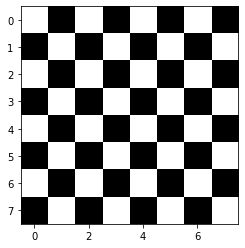

In [1]:
import matplotlib.pyplot as plt
dim = 8    # dimension of th eplot

checker = [[0 if (i+j)%2 else 255 for i in range(dim)] for j in range(dim)]
print(checker)

plt.imshow(checker, cmap='gray', vmin = 0, vmax = 255)
plt.show()

Different analyses require the data to be in different shapes.  An $8 \times 8$ lists of lists was required by <font face='courier'>matplotlib</font> for the plot above.  The two-dimensional plot is appropriate inpute for some neural networks but, if this pattern were to be analyzed by other neural network architectures, it would need to be in a one-dimensional array.

Flattened view of data

In [2]:
[checker[i][j] for i in range(len(checker)) for j in range(len(checker[i]))]

[255,
 0,
 255,
 0,
 255,
 0,
 255,
 0,
 0,
 255,
 0,
 255,
 0,
 255,
 0,
 255,
 255,
 0,
 255,
 0,
 255,
 0,
 255,
 0,
 0,
 255,
 0,
 255,
 0,
 255,
 0,
 255,
 255,
 0,
 255,
 0,
 255,
 0,
 255,
 0,
 0,
 255,
 0,
 255,
 0,
 255,
 0,
 255,
 255,
 0,
 255,
 0,
 255,
 0,
 255,
 0,
 0,
 255,
 0,
 255,
 0,
 255,
 0,
 255]

## 3D Data: Image Processing
Back to <a href = '#navigation'>Navigation</a>

We view images in 2 dimensions.  Color images, however, require 3-dimensional data because the color of each pixel is a mixture of Red, Green, and Blue (RGB) hue intensities.

The image below shows the data structure of a color image that is $3 \times 3$ pixels.  The data required for rendering pixel $[0][0]$, for example, requires the three data elements noted in the figure.

![RGB Data Structure](images/RGB1Image.jpg 'Data Structure for RGB Image')

## Read & Display Color (RGB) 3D Image Data
Back to <a href = '#navigation'>Navigation</a>

* Data structure
  * 3-dimensional array (tensor)
  * Represented with a Python list of of lists of lists
* Operations
  * Reading 3D data from a file
* Analysis
  * Rendering the data with <font face='courier'>matplotlib</font>

<font face='courier'>image.txt</font> contains RGB data for an image that is 374 pixels wide by 288 pixels high.  Each pixel is encoded in RGB by three integers from 0 to 255 each of which indicates the hue intensity of red, green, and blue, respectively.  (Larger values indicate greater hue intensity.)  The data file is structured with the data for each pixel on a separate line with the three values separated by commas.  Don't forget that each line in a text file ends with the 'hidden' character '\n'.  The data needs to be structured in the three-dimensional format as indicated in the previous figure.

Read that data, putting it into a $374 \times 288$ image with each pixel coded with a 3-element RGB code.

In [ ]:
[[[r,g,b],[r,g,b],[r,g,b], ... ],[],[],[]]

Height: 288   Width: 374   Number of RGB elements: 3   Sample pixel RGB: [90, 170, 83]


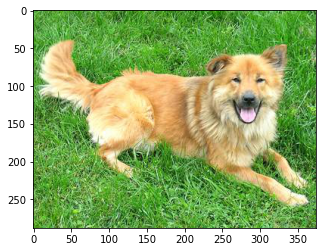

In [3]:
import matplotlib.pyplot as plt

f = open('image.txt','r')
dimHorizontal = 374
dimVertical = 288
image = []

for i in range(dimVertical):
    newRow = []
    for j in range(dimHorizontal):
        pixel = f.readline()
        pixel = pixel.strip()
        pixel = pixel.split(',')
        for k in range(len(pixel)):
            pixel[k] = int(pixel[k])
        newRow.append(pixel)
    image.append(newRow)


f.close()

print('Height:',len(image),'  Width:', len(image[0]), '  Number of RGB elements:',len(image[0][0]), \
      '  Sample pixel RGB:', image[0][0])
plt.imshow(image)
plt.show()

In [ ]:
image = [[[int(poxel[hue]) for hue in f.readline().strip().split(',')] for j in range(dimHorizontal)] for i in range(dimVertical)]
print(image)

Construct the file using list comprehension

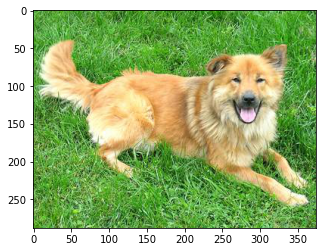

In [3]:
import matplotlib.pyplot as plt

""" Open the file """
f = open('image.txt','r')
#data = f.readlines()
dimHorizontal = 374
dimVertical = 288

""" Process the data """
#image = [[[int(pixel) for pixel in data[i*dimHorizontal + j].strip().split(',')] for j in range(dimHorizontal)] for i in range(dimVertical)]
image = [[[int(pixel) for pixel in f.readline().strip().split(',')] for j in range(dimHorizontal)] for i in range(dimVertical)]
f.close()

plt.imshow(image)
plt.show()

## Repeat Data Acquisition with List Comprehension


In [8]:
image = [[[int(pixel) for pixel in f.readline().strip().split(',')] for j in range(dimHorizontal)] for i in range(dimVertical)]

ValueError: I/O operation on closed file.

## Exercise: Display just the Dog's Head 

If you have executed the code above, then you have a list of lists already populated named iamge from which you can display the required data for displaying the dog's head.

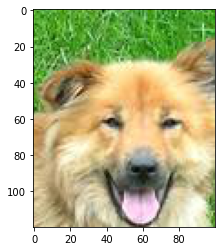

In [6]:
newImage = []
heightBottom = 30
heightTop = 150
widthLeft = 225
widthRight = 325

for i in range(heightBottom,heightTop):
    newRow = []
    for j in range(widthLeft,widthRight):
        newRow.append(image[i][j])
    #newRow.append(image[i][widthLeft:widthRight])
    #newImage.append(image[i][widthLeft:widthRight])
    newImage.append(newRow)
    
plt.imshow(newImage)
plt.show()

## Repeat Using List Comprehension

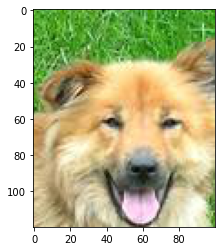

In [16]:
f = open('image.txt','r')
#newImage1 = [[[int(pixel) for pixel in f.readline().strip().split(',')] for j in range(widthLeft,widthRight)] for i in range(heightBottom,heightTop)]
newImage1 =[[image[i][j] for j in range(widthLeft,widthRight)] for i in range(heightBottom,heightTop)]
plt.imshow(newImage1)
plt.show()

## Creating Dictionaries from Text Files
Back to <a href = '#navigation'>Navigation</a>

Dictionaries provide for fast lookup of values based on (unique) assigned to each value.  In mathematical terms, dictionaries provide a _mapping_ of keys to values.

### An easy example

* Data structure
  * Dictionary with key-value structure
* Operations
  * Reading data from a file
      * <font face = 'courier'>for</font> loop
      * list comprehension
* Analysis
  * None

Each line of the file <font face = 'courier'>npNameLoc.txt</font> contains the name of a United States National Park and the state in which that park is located.  Read the file and create a dictionary where the key is the name of the park and the value is a string indicating the state in which the park is located.

In [12]:
""" Read the data """
f_in = open('npNameLoc.txt','r')
data = f_in.readlines()
f_in.close()

#headings = data[0]
#data = data[1:]

""" Create the dictionary """
natParkDict1 = {}
for i in range(1, len(data)):
    data[i] = data[i].strip()
    data[i] = data[i].split(',')
    natParkDict1[data[i][0]] = data[i][1]
natParkDict1

{'Acadia': 'Maine',
 'American Samoa': 'American Samoa',
 'Arches': 'Utah',
 'Badlands': 'South Dakota',
 'Big Bend': 'Texas',
 'Biscayne': 'Florida',
 'Black Canyon of the Gunnison': 'Colorado',
 'Bryce Canyon': 'Utah',
 'Canyonlands': 'Utah',
 'Capitol Reef': 'Utah',
 'Carlsbad Caverns': 'New Mexico',
 'Channel Islands': 'California',
 'Congaree': 'South Carolina',
 'Crater Lake': 'Oregon',
 'Cuyahoga Valley': 'Ohio',
 'Death Valley': 'California Nevada',
 'Denali': 'Alaska',
 'Dry Tortugas': 'Florida',
 'Everglades': 'Florida',
 'Gates of the Arctic': 'Alaska',
 'Gateway Arch': 'Missouri',
 'Glacier': 'Montana',
 'Glacier Bay': 'Alaska',
 'Grand Canyon': 'Arizona',
 'Grand Teton': 'Wyoming',
 'Great Basin': 'Nevada',
 'Great Sand Dunes': 'Colorado',
 'Great Smoky Mountains': 'Tennessee North Carolina',
 'Guadalupe Mountains': 'Texas',
 'Haleakal': 'Hawaii',
 'Hawaii Volcanoes': 'Hawaii',
 'Hot Springs': 'Arkansas',
 'Indiana Dunes': 'Indiana',
 'Isle Royale': 'Michigan',
 'Joshua Tr

### Complete the task above with dictionary comprehension

In [18]:
""" Read the data """
f_in = open('npNameLoc.txt','r')
data = f_in.readlines()
f_in.close()

data.pop(0)

""" Create the dictionary """

"""for i in range(len(data)):
    data[i] = data[i].strip().split(',')
"""
#data = [data[i].strip.split(',') for i in range(len(data))]
#natParkDict1 = {data[i][0]:data[i][1] for i in range(len(data))}

#natParkDict1 = {k:v for k,v in [data[i].strip().split(',') for i in range(len(data))]}
data
#natParkDict1

FileNotFoundError: [Errno 2] No such file or directory: 'npNameLoc.txt'

### A more difficult example: Electrical Grid Networks

* Data structure
  * Dictionary with key-value structure
  * Keys are tuples
  * Values are floating-point values
* Operations
  * Reading data from a file
      * <font face = 'courier'>for</font> loop
      * Alternately, list comprehension could be used
* Analysis
  * Cluster analysis

_Small World Networks_ have been a popular topic in recent years, both in academic research as well as in popular magazines.  The idea that all humans are separated by no more than _six degrees of separation_ is intrguiing ([Wikipedia Link](https://en.wikipedia.org/wiki/Six_degrees_of_separation) and you may have heard about how all movie stars are connected via the movies they've played in with no more than six connections from the actor Kevin Bacon: ([The Oracle of Kevin Bacon](https://oracleofbacon.org/).  Studies of other networks such as electrical grids reveal small-world networks that are highly connected.  One famous paper on this topic is by Duncan Watts and Steven Strogatz [Watts & Strogatz](http://worrydream.com/refs/Watts-CollectiveDynamicsOfSmallWorldNetworks.pdf).

Suppose we are analyzing an electricity distribution network and we are concerned with the connectedness of the network and, in particular, with identifying clusters of highly-connected clusters that are connected relatively sparsely with the remainder of the network.  The sparse connections ebtween highly-connected clusters identify the vulnerable parts of the network that could cause widespread electricity outages, as illustrated below.  See [Related GE Grid Story](https://www.ge.com/reports/post/74545123735/its-a-small-world-ge-google-maps-to-draw-a/), [Related Academic Article](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=5448813), and [Another Academic Article](https://ieeexplore.ieee.org/abstract/document/4116107).  We are also concerned with the miles of cable that have been used for connectiong the junctions of the network.

![Vulnerable Network](images\network.jpg)

We will input data into a dictionary for this analysis.  The dictionary keys will be the location IDs, as a tuple with elements indicating the location IDs that are connected, and the values will be the miles of cable connecting the two points.  The data is in the file <font face='courier'>network.txt</font> and each line has three values, in this order:

Location 1 ID, Location 2 ID, miles of cable

Notice that if two locations are connected than the ordering of the location IDs is arbitrary and there is only one row reflecting that connection.  In other words, there is only one row of data per connection and we will not find a stat row '1,2,50' if another row with '2,1,50' is in the data file.

#### 1st Task: Create a Dictionary
Open the data file named <font face='courier'>network.csv</font>, which documents the connections between the 101 points in the network, and create a dictionary named <font face='courier'>network</font> with these keys and values:
- The key is a tuple with the integers representing the IDs of two point being conencted with a cable
- The value is the distance between those points

#### 2nd Task: Identify a Cluster
Take the arbitrary point ID = 0 and determine all the points that have a connection with that point, either directly or through another point or points.  Print (1) the number of connected points and (2) the IDs of those points.  We will use the <font face='courier'>set</font> data type to solve this problem.

In [14]:
network = {}

f_in = open('network.csv','r')
data = f_in.readlines()
for i in range(len(data)):
    data[i] = data[i].strip()
    data[i] = data[i].split(',')
    network[(int(data[i][0]),int(data[i][1]))] = float(data[i][2])
network

{(0, 100): 29.650822762731444,
 (1, 79): 25.183326079762374,
 (1, 51): 40.17198322997313,
 (1, 24): 46.28398512980775,
 (1, 25): 44.14396190577285,
 (1, 34): 26.444456427147838,
 (1, 38): 38.011563229414534,
 (1, 90): 24.817411264149612,
 (2, 20): 11.505948990970666,
 (2, 38): 45.97081157165906,
 (2, 48): 15.728440591360554,
 (2, 73): 7.566788644375238,
 (2, 68): 8.839684180461854,
 (2, 62): 21.645806290063668,
 (2, 61): 0.1640267069338952,
 (3, 11): 37.849867925504896,
 (3, 16): 41.169239499664336,
 (3, 87): 10.445595709748073,
 (3, 75): 29.815447995751587,
 (3, 56): 36.51689276008839,
 (3, 51): 9.142737875542545,
 (3, 61): 21.561245278138035,
 (3, 52): 5.735839541019116,
 (3, 19): 11.595460787804935,
 (3, 8): 4.905968055486659,
 (3, 83): 40.12877528949343,
 (3, 68): 39.21361074810862,
 (3, 26): 4.877088194395385,
 (3, 30): 11.1166105180386,
 (3, 18): 3.1175732161068392,
 (4, 24): 25.779114999786966,
 (4, 40): 23.269351087435624,
 (4, 89): 16.8972464681901,
 (4, 78): 43.59151239016293

In [15]:
clustIDs = {0}
clustCount = len(clustIDs)

# Iterate through the locations to find other connected locations until no further locations are found
while True:
    for k in network.keys():
        if k[0] in clustIDs or k[1] in clustIDs:
            clustIDs.add(k[0])
            clustIDs.add(k[1])
    newclustCount = len(clustIDs)
    if newclustCount == clustCount:
        break
    else:
        clustCount = newclustCount
    
print('Number of points in the connected cluster:',clustCount)
print('Connected cluster points membership:',clustIDs)

Number of points in the connected cluster: 101
Connected cluster points membership: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}


# Afterward
Back to <a href = '#navigation'>Navigation</a>

This notebook has provided exercises in these critical Python skills:

- Iterating through data with <font face='courier'>for</font> loops
- Experience with, and examples of where comprehending the multi-dimensionality of data is important
- Examples requiring data in different numbers of dimensions

Expertise with <font face='courier'>for</font> loops is always needed in Python, regardless of the level of expertise one attains.  Packages such as <font face='courier'>pandas</font> and <font face='courier'>numpy</font> make reshaping data structures and reading data from files easier, but a programmer will not be successful, even with these tools, if they cannot visualize data structures in multiple dimensions.  Manually iterating through data of multiple dimensions as we have done helps to build that intuition.  Even with easy-to-use reshaping functions in <font face='courier'>pandas</font> and <font face='courier'>numpy</font>, expertise with <font face='courier'>for</font> loops is still frequently required for purposes other than reading and initializing data structures.

# Review of <font face='courier'>for</font> Loops
Back to <a href = '#navigation'>Navigation</a>

<font face='courier'>for</font> loops can be used to access the elements of _iterable_ data types, which includes:

- lists
- tuples
- dictionaries

Elements can sometimes be revised of the data type is mutable.  Lists can be freely changed, tuples cannot be changed, while dictionary values can be changed although dictionary keys cannot.  This section reviews the basics of _iterating_ through lists and dictionaries.

## Looping through Lists <a name='loops' />
Back to <a href = '#navigation'>Navigation</a>

You can access all the elements within a list using a _for_ loop.  This approach is generally called _iterating through a list_.  Lists are just one of the data types that you can iterate through: we call the collection of all such data types <font face='courier'>iterables</font>. For loops are perfect for accessing all the elements in a list because the <font face='courier'>len()</font> function cand be used to determine how many times the loop must be executed.  

There are two ways to iterate through data and objects with for loop, which are illustrated below:
- by index
- directly by referencing the items being iterated

Within a loop, we can access the value of a list element and use it in a computation or assign a new value to it.

In [ ]:
myList = [65,89,21,34,72,38,50,68,17]

We can loop through a list and access each element by using a dummy variable <font face='courier'>ele</font> (short for element), which is assigned a copy of the value of each element.  For starters, we will jsut print each element.

In [ ]:
for ele in myList:
    print(ele)

Alternatively, we can print each element by constructing a range of indices that corresponds with the length of the list, and use those indices to access the data elements.

In [ ]:
for i in range(len(myList)):
    print(myList[i])

So far, we have just accessed the value as if we were printing them or using them in a computation.  What if we wanted to change some values in the list.  Here is one approach.  Does it work?

In [ ]:
for i in range(len(myList)):
    if myList[i] > 60:
        myList[i] = 'new value'
print(myList)

Now, let's use the first approach we demonstrated.

In [ ]:
myList = [65,89,21,34,72,38,50,68,17]
for ele in myList:
    if ele > 60:
        ele = 'new value'
print(myList)

Let's discuss what is going on.  You cannot, obviously, use the approach in the cell above to change values in a list.

## List Comprehension Basics <a name='ListComprehension' />
Back to <a href = '#navigation'>Navigation</a>

List comprehension is a technique that can be though of condensing the number of statements required to create a new list using for loops.  List comprehension creates more succinct programs and also has speed and memory usage benefits.  The first cell below is a typical way we might create a new list of random numbers from scratch.

In [4]:
import random
numElements = 10
newList = []

for i in range(numElements):
    newList.append(random.random())
newList

[0.9492164330807416,
 0.5337135416972826,
 0.9013024774519488,
 0.1581221171237952,
 0.29381028708824275,
 0.68975675670147,
 0.22550624015319887,
 0.24749018333174222,
 0.899155890417238,
 0.43780630361992945]

The method for compacting a for loop into a list comprehension state is illustrated below.

![List Comprehension Structure](images/listComprehension1.jpg)
![List Comprehension Example](images/listComprehension.jpg)

In [5]:
import random
numElements = 10

newList1 = [random.random() for i in range(numElements)]
newList1

[0.42499784714529243,
 0.2547467430538527,
 0.40270524607645686,
 0.44129067969534685,
 0.4354263668444396,
 0.11988241044997938,
 0.7964339633498798,
 0.6681757201601007,
 0.8476938690551729,
 0.9294913071431066]

Logic operations can be used within list comprehension statements to filter the elements appended to the list.


![List Comprehension Structure w/Logic](images/listComprehension2.jpg)

For example, we could use the following code if we wanted to create a list of even numbers through 20.

In [ ]:
newList2 = [i for i in range(21) if i%2 == 0]
newList2

## Dictionaries <a name = "dictionaries" />
Back to <a href = '#navigation'>Navigation</a>

Dictionaries:
- Are indicated by curly braces each of its elements, which are separated by commas, have two components separated by a colon
- Dictionary element _keys_ are indicated before the colon
- Dictionary element _values_ are indicated after the colon
- Each key is unique: only one dictionary may have any particular key
- We often think of a dictionary key as a way to look up a dictionary value

You can simply use a key to look up a dictionary value or change the value.

In [ ]:
# Example dictionary
myDiction = {0:'cero', 1:'uno', 2:'sod', 3:'tres'}

In [ ]:
print(myDiction[2])

In [ ]:
myDiction[2] = 'dos'
print(myDiction)

## Looping through Dictionaries <a name='LoopThroughDict' />
Back to <a href = '#navigation'>Navigation</a>

We can use loops to access all the elements in a dictionary.  Dictionaries are usual _iterated_ through by key, which means that we access all of the uniques in one manner or another.  Two of the ways are illustrated below, the first of which shows that when we simply put the dictionary name in a for statement, we iterate through teh keys by default.  We can also explicitly use the <font face = 'courier'>.keys()</font> property of dictionaries to remind ourselves that we are iterating through the keys: this is the second approach below.

In [ ]:
for key in myDiction:
    print(key, myDiction[key])

In [ ]:
for k in myDiction.keys():
    print(k, myDiction[k])

A frequently-used method of looping explicitly through both the keys and values in a dictionary is as follows using the <font face = 'courier'>.items()</font> method of dictionaries.  When two dummy variables are used in the for statement each key and value pair are _unpacked_ into the two variables.

In [ ]:
for key,value in myDiction.items():
    print(key,value)

Or, you can use this more succinct code.  As you get more experience it will be obvious that you are dealing with a dictionary and <font face='courier'>k</font> is the key and <font face='courier'>v</font> is the value.

In [ ]:
for k,v in myDiction.items():
    print(k,v)

## Dictionary Comprehension Basics <a name='DictComp' />
Back to <a href = '#navigation'>Navigation</a>

Dictionaries can be created with _dictionary comprehension_  just as lists can be generated with _list comprehension_.  The differences between list comprehension and dictioanry comprehension are that the latter uses curly braces rather than square brackets and the specification for what is appended to the dictionary requires both a key and a value, separated by a colon. One of many prototypical forms of dictionary comprehension is this:

<font face='courier'>newDictionary = {k:v for k,v in some_iterator}</font>

Dictionary comprehension is useful when filestreams are read, which need to be put into dictionaries, or if, for example, lists need to be converted to dictionaries.  For these demonstration, let's assume that we have a list of lists, where each sublist contains the name of a national parks and its acreage.  Let's construct a dictionary from this list of lists with the national park name as the key and the acreage as the value.

The first cells show multiple ways to use for loops for thsi task and the corresponding methods with dictionary comprehension.

Source: National Parks data was extracted from [Wikipedia National Parks page](https://en.wikipedia.org/wiki/List_of_national_parks_of_the_United_States).

In [ ]:
natParksList = [['Acadia',49075.26], ['Yellowstone',2219790.71], ['Yosemite',761747.5], ['Shenandoah',199223.77], \
                ['Saguro',91715.72], ['Petrified Forest',221390.21]]
natParksList

## Dictionaries from _for_ Loops
Back to <a href = '#navigation'>Navigation</a>

In [ ]:
natParksDict1 = {}
for i in range(len(natParksList)):
    natParksDict1[natParksList[i][0]] = natParksList[i][1]
natParksDict1

In [ ]:
natParksDict2 = {}
for x in natParksList:
    natParksDict2[x[0]] = x[1]
natParksDict2

In [ ]:
natParksDict3 = {}
for name,acreage in natParksList:
    natParksDict3[name] = acreage
natParksDict3

## Dictionaries with Dictionary Comprehension
Back to <a href = '#navigation'>Navigation</a>

The logic of unpacking a for loop and inserting the contents into a dictionary comprehension statement is the same as with list comprehension, except for tweaks that are appropriate for dictionaries: curly braces and specifying a key and a value to insert in each implicit iteration.

![Dictionary Comprehension Template](images/dictComp.jpg)

In [ ]:
natParksDict1DC = {natParksList[i][0]:natParksList[i][1] for i in range(len(natParksList))}
natParksDict1DC

In [ ]:
natParksDict2DC = {x[0]:x[1] for x in natParksList}
natParksDict2DC

In [ ]:
natParksDict3DC = {name:acreage for name,acreage in natParksList}
natParksDict3DC

# Aliasing <a name = 'aliasing' />
Back to <a href = '#navigation'>Navigation</a>

Aliasing the the act of referencing the same memory location/variable using multiple names.  It happens most often unintentionally and can cause a frustrating debugging adventure.

with <font face='courier'>int</font> and <font face='courier'>float</font> data types there is no chance of aliasing.  Everything works intuitively.  When we change the value of <font face='courier'>p</font> we change only its value and not the value of <font face='courier'>q</font>.  The converse is true when we change the value of <font face='courier'>q</font>.

In [ ]:
p = 1
q = p
p = 2
print('p =',p,'     q =',q)

When we assign a list to another list, however, both list names point to the same data, which is to say that they both pint to the same place in memory.

In [ ]:
x = [1,2]
y = x
y[0] = 99
print('x =',x,'     y =',y)

We often need to create a list, or list of lists, to receive our computations, such as when we are computing the tranpose of a lsit of lists.  Using the apprach above would create aliasing and we would either end up with a matrix with the wrong values, or we would corrupt the original matrix, or both.

One safe way to create a list of lists of the same dimension as an existing list of lists, use the approach in the cell below.

In [ ]:
X = [[0,1,2],[3,4,5],[6,7,8]]  # original list of lists
Y = [[0 for i in range(len(X[0]))] for j in range(len(X))] # list of lists to receive the transpose
print('Y  =',Y,'\n')
Y[0][0] = 99
print('Y =',Y,'\n')
print('X =',X,'\n')

You may also import the <font face='courier'>copy</font> package and use the <font face='courier'>copy.deepcopy()</font> method (see [<font face='courier'>list.copy() function</font>](https://docs.python.org/3.6/library/copy.html)) but I prefer the approach above.

I have had issues with aliasing with the methods below, so <font color='red'><b>DO NOT USE THE METHODS BELOW</b></font>.

In [ ]:
X = [[0,1,2],[3,4,5],[6,7,8]]  # original list of lists
Y = [[0] * len(X[0])]  * len(X)  # list of lists to receive the transpose
print('Y  =',Y,'\n')
Y[0][0] = 99
print('Y =',Y,'\n')
print('X =',X,'\n')

In [ ]:
X = [[0,1,2],[3,4,5],[6,7,8]]  # original list of lists
Y = X.copy()  # list of lists to receive the transpose
print('Y  =',Y,'\n')
Y[0][0] = 99
print('Y =',Y,'\n')
print('X =',X,'\n')

These approaches successfully create copies of list while avoiding aliasing for 1-dimensional matrices, but they create aliasing with multidimensional matrices.

In [ ]:
X = [[0,1,2],[3,4,5],[6,7,8]]  # original list of lists
Y = X[:]  # list of lists to receive the transpose
print('Y  =',Y,'\n')
Y[0][0] = 99
print('Y =',Y,'\n')
print('X =',X,'\n')

In [ ]:
X = [[0,1,2],[3,4,5],[6,7,8]]  # original list of lists
Y = list(X) # list of lists to receive the transpose
print('Y  =',Y,'\n')
Y[0][0] = 99
print('Y =',Y,'\n')
print('X =',X,'\n')